In [10]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [11]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models
from tensorflow.keras.optimizers import Adam


## Data Preprocessing

In [12]:
training_set = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True).flow_from_directory(
    'Plant_Disease_Dataset/train',
   target_size=(128, 128),
    color_mode='rgb',
    classes=None,
    class_mode='categorical',
    batch_size=32,
    shuffle=True,
    seed=None,
    save_to_dir=None,
    save_prefix='',
    save_format='png',
    follow_links=False,
    subset=None,
    interpolation='nearest',
    keep_aspect_ratio=False
)


Found 70295 images belonging to 38 classes.


In [13]:
Validation_set = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,       #data augmantation
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True).flow_from_directory(
    'Plant_Disease_Dataset/valid',
 target_size=(128, 128),
    color_mode='rgb',
    classes=None,
    class_mode='categorical',
    batch_size=32,
    shuffle=False,
    seed=None,
    save_to_dir=None,
    save_prefix='',
    save_format='png',
    follow_links=False,
    subset=None,
    interpolation='nearest',
    keep_aspect_ratio=False
)

Found 17572 images belonging to 38 classes.


In [14]:
from tensorflow.keras.layers import BatchNormalization

model = models.Sequential([
    layers.Flatten(input_shape=(128, 128, 3)),
    layers.Dense(1024, activation='relu'),
    BatchNormalization(),
    layers.Dense(512, activation='relu'),
    BatchNormalization(),
    layers.Dense(256, activation='relu'),
    BatchNormalization(),
    layers.Dropout(0.5),
    layers.Dense(38, activation='softmax')
])


In [15]:

model.compile(optimizer=Adam(learning_rate=0.0001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [16]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 49152)             0         
                                                                 
 dense_3 (Dense)             (None, 1024)              50332672  
                                                                 
 batch_normalization (Batch  (None, 1024)              4096      
 Normalization)                                                  
                                                                 
 dense_4 (Dense)             (None, 512)               524800    
                                                                 
 batch_normalization_1 (Bat  (None, 512)               2048      
 chNormalization)                                                
                                                                 
 dense_5 (Dense)             (None, 256)              

In [17]:
from tensorflow.keras.callbacks import ReduceLROnPlateau

lr_reduction = ReduceLROnPlateau(monitor='val_loss', patience=3, factor=0.5, verbose=1)
history = model.fit(training_set, validation_data=Validation_set, epochs=40, callbacks=[lr_reduction])

Epoch 1/40
2197/2197 [==============================] - 955s 434ms/step - loss: 2.6234 - accuracy: 0.3116 - val_loss: 2.3871 - val_accuracy: 0.3358 - lr: 1.0000e-04
Epoch 2/40
2197/2197 [==============================] - 543s 247ms/step - loss: 1.9448 - accuracy: 0.4380 - val_loss: 2.7463 - val_accuracy: 0.2832 - lr: 1.0000e-04
Epoch 3/40
2197/2197 [==============================] - 542s 246ms/step - loss: 1.7175 - accuracy: 0.4897 - val_loss: 1.6799 - val_accuracy: 0.4926 - lr: 1.0000e-04
Epoch 4/40
2197/2197 [==============================] - 540s 246ms/step - loss: 1.5700 - accuracy: 0.5287 - val_loss: 1.3722 - val_accuracy: 0.5919 - lr: 1.0000e-04
Epoch 5/40
2197/2197 [==============================] - 593s 270ms/step - loss: 1.4476 - accuracy: 0.5637 - val_loss: 2.7130 - val_accuracy: 0.3250 - lr: 1.0000e-04
Epoch 6/40
2197/2197 [==============================] - 566s 258ms/step - loss: 1.3591 - accuracy: 0.5859 - val_loss: 1.1778 - val_accuracy: 0.6394 - lr: 1.0000e-04
Epoch 7/40

## Saving Model

In [18]:
history.history #Return Dictionary of history

{'loss': [2.623438596725464,
  1.944806694984436,
  1.7175283432006836,
  1.5699656009674072,
  1.4475936889648438,
  1.3590528964996338,
  1.2903932332992554,
  1.2364509105682373,
  1.19577956199646,
  1.1464825868606567,
  1.1118422746658325,
  1.0799380540847778,
  1.0446940660476685,
  1.03517484664917,
  1.0091441869735718,
  0.9812233448028564,
  0.9682862162590027,
  0.9480109214782715,
  0.9336124658584595,
  0.876926839351654,
  0.8651131391525269,
  0.8573458790779114,
  0.8473786115646362,
  0.8368694186210632,
  0.8293492197990417,
  0.8187985420227051,
  0.8148627281188965,
  0.8060055375099182,
  0.8003308176994324,
  0.7971809506416321,
  0.778335690498352,
  0.7666810750961304,
  0.7642764449119568,
  0.7584199905395508,
  0.7540884613990784,
  0.7506070137023926,
  0.7475142478942871,
  0.7444565296173096,
  0.7360408306121826,
  0.7273619771003723],
 'accuracy': [0.31155842542648315,
  0.4379970133304596,
  0.4897361099720001,
  0.5286577939987183,
  0.56372427940368

In [19]:
import json

In [21]:
import numpy as np

def convert_numpy(obj):
    if isinstance(obj, np.ndarray):
        return obj.tolist()
    if isinstance(obj, (np.float32, np.float64)):
        return float(obj)
    if isinstance(obj, (np.int32, np.int64)):
        return int(obj)
    return obj

with open('training_hist_ann_2.json', 'w') as f:
    json.dump(history.history, f, default=convert_numpy)


In [22]:
model.save('Trained_plant_disease_model_ANN_2.keras')

## Load model

In [23]:
model = tf.keras.models.load_model('Trained_plant_disease_model_ANN_2.keras')



## Evaluate Model

In [24]:
loss, acc = model.evaluate(Validation_set)
print(f"Validation Accuracy: {acc:.2f}")


550/550 [==============================] - 33s 60ms/step - loss: 0.5104 - accuracy: 0.8384
Validation Accuracy: 0.84


In [25]:
#Training set Accuracy
train_loss, train_acc = model.evaluate(training_set)
print('Training accuracy:', train_acc)

2197/2197 [==============================] - 132s 60ms/step - loss: 0.4802 - accuracy: 0.8553
Training accuracy: 0.8552528619766235


## Accuracy Visualization

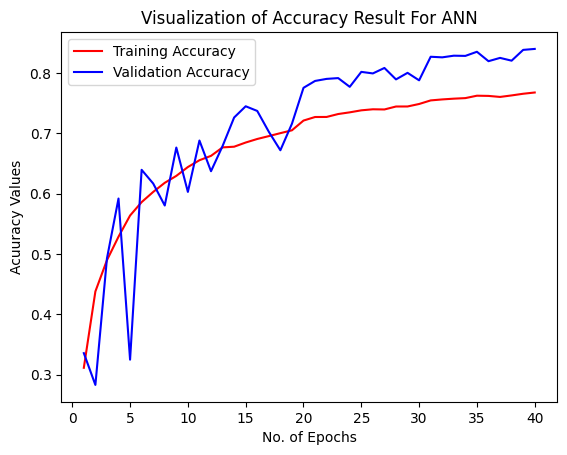

In [26]:
epochs = range(1, len(history.history['accuracy']) + 1)

plt.plot(epochs,history.history['accuracy'],color='red',label='Training Accuracy')
plt.plot(epochs,history.history['val_accuracy'],color='blue',label='Validation Accuracy')
plt.xlabel('No. of Epochs')
plt.ylabel('Acuuracy Values')

plt.title('Visualization of Accuracy Result For ANN')
plt.legend()
plt.show()

## Some other metrics for model evaluation

In [27]:
test_set = tf.keras.utils.image_dataset_from_directory(
    'Plant_Disease_Dataset/valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=1,
    image_size=(128, 128),
    shuffle=False,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 17572 files belonging to 38 classes.


In [28]:
class_name = test_set.class_names


In [29]:
y_pred = model.predict(test_set)
predicted_categories = tf.argmax(y_pred, axis=1)

17572/17572 [==============================] - 131s 7ms/step


In [30]:
true_categories = tf.concat([y for x, y in test_set], axis=0)
Y_true = tf.argmax(true_categories, axis=1)

In [31]:
Y_true

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37], dtype=int64)>

In [32]:
predicted_categories

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 2,  4, 22, ...,  2,  2,  2], dtype=int64)>

### NEW imports for model report

In [33]:
import pandas as pd
from sklearn.metrics import confusion_matrix,classification_report
import numpy as np

In [34]:
cm = confusion_matrix(Y_true,predicted_categories)
report_df = classification_report(Y_true,predicted_categories,target_names=class_name,output_dict=True)
report_df = pd.DataFrame(report_df).transpose()
report_df = report_df.iloc[:-3, :]

c:\ProgramData\anaconda3\envs\Deeplearning_gpu_env\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\anaconda3\envs\Deeplearning_gpu_env\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\anaconda3\envs\Deeplearning_gpu_env\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, m

In [36]:
# Precision Recall Fscore
print(classification_report(Y_true,predicted_categories,target_names=class_name))

                                                    precision    recall  f1-score   support

                                Apple___Apple_scab       0.00      0.00      0.00       504
                                 Apple___Black_rot       0.00      0.00      0.00       497
                          Apple___Cedar_apple_rust       0.03      1.00      0.06       440
                                   Apple___healthy       0.00      0.00      0.00       502
                               Blueberry___healthy       0.13      0.30      0.18       454
          Cherry_(including_sour)___Powdery_mildew       0.00      0.00      0.00       421
                 Cherry_(including_sour)___healthy       0.00      0.00      0.00       456
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot       0.00      0.00      0.00       410
                       Corn_(maize)___Common_rust_       1.00      0.00      0.00       477
               Corn_(maize)___Northern_Leaf_Blight       0.00      0.00      0.

c:\ProgramData\anaconda3\envs\Deeplearning_gpu_env\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\anaconda3\envs\Deeplearning_gpu_env\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\anaconda3\envs\Deeplearning_gpu_env\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, m

## DATA VISUAlisation

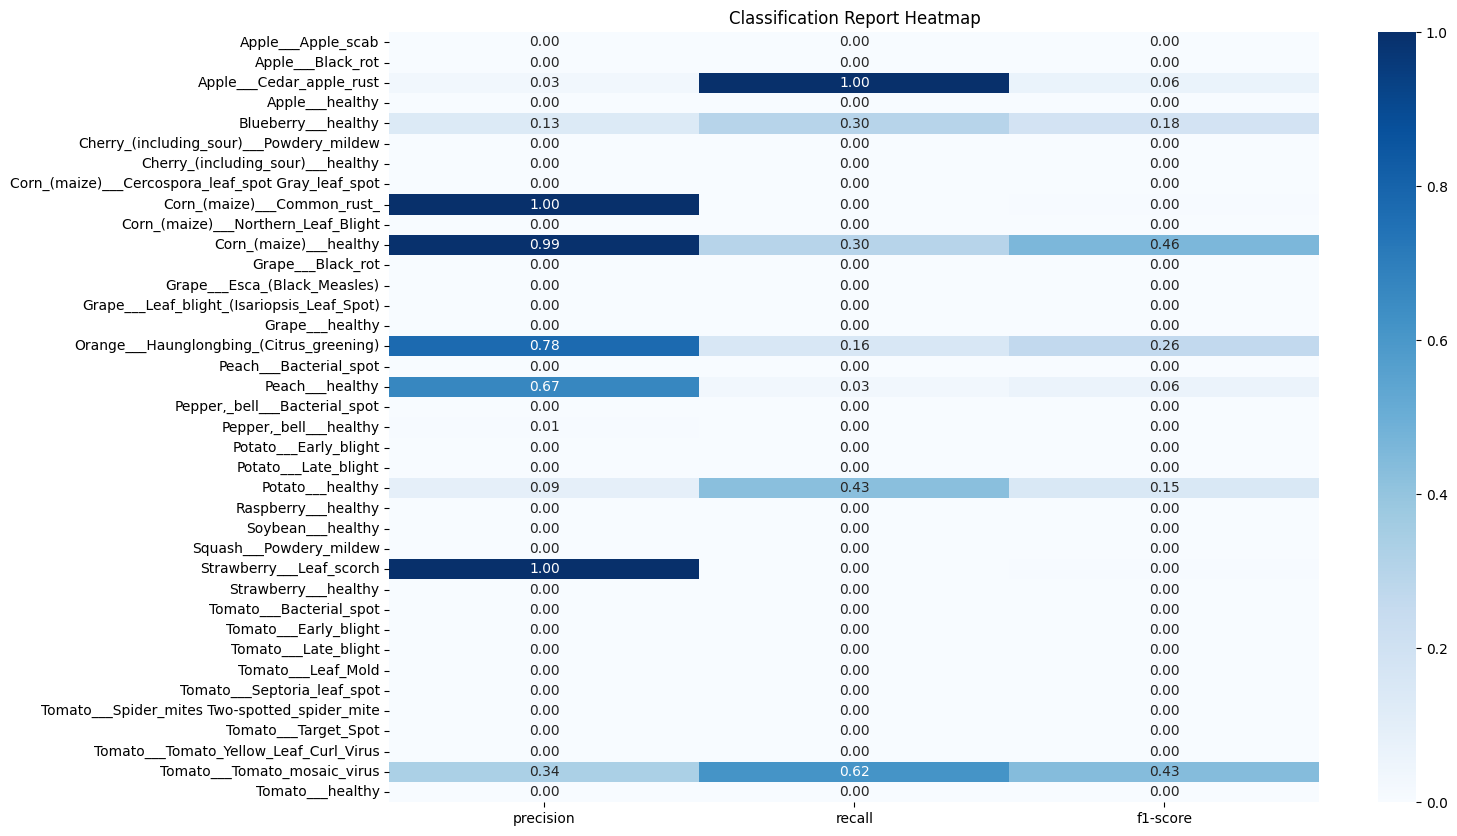

In [37]:

plt.figure(figsize=(15,10))
sns.heatmap(report_df[['precision','recall','f1-score']], annot=True, cmap='Blues', fmt='.2f')
plt.title('Classification Report Heatmap')
plt.show()

### Precision plot

c:\ProgramData\anaconda3\envs\Deeplearning_gpu_env\lib\site-packages\seaborn\categorical.py:1273: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(aggregator, agg_var)


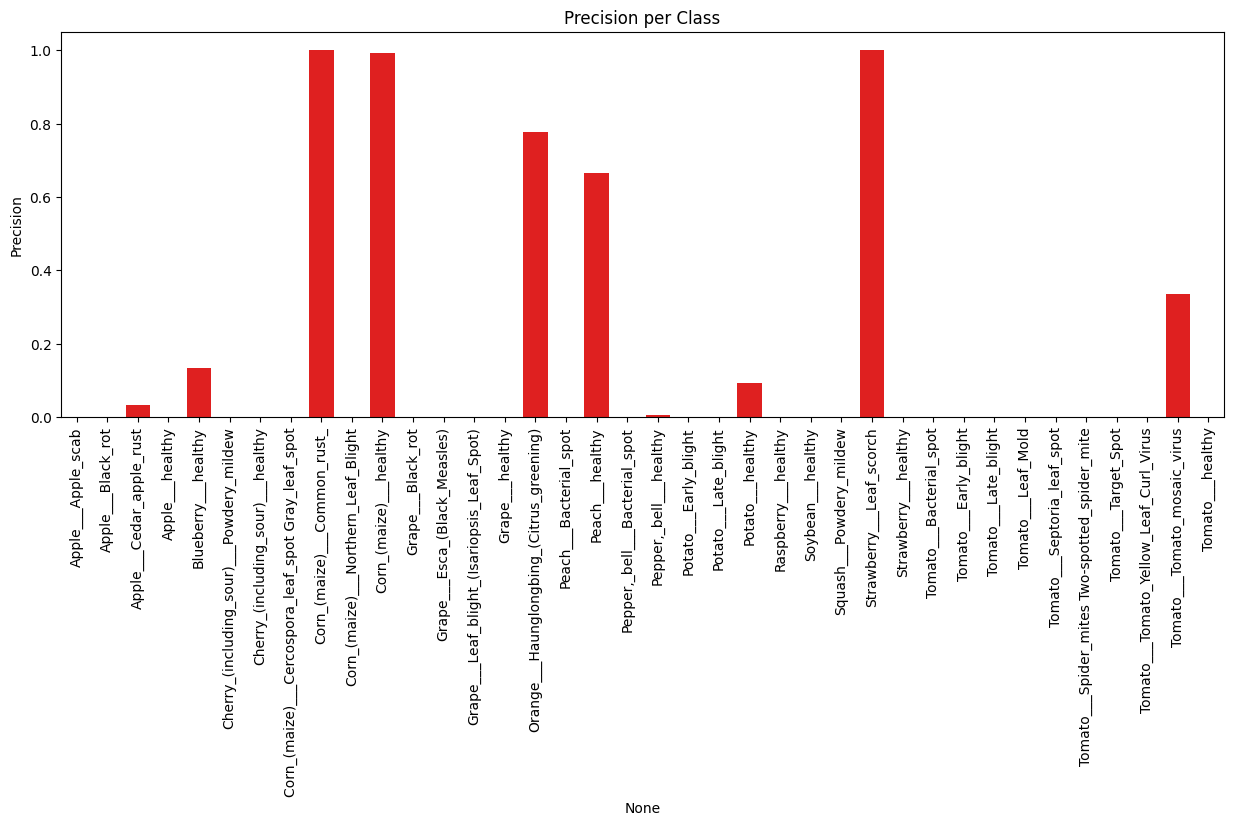

In [38]:
plt.figure(figsize=(15,5))
sns.barplot(x=report_df.index, y=report_df['precision'], color='red')
plt.xticks(rotation=90)
plt.ylabel('Precision')
plt.title('Precision per Class')
plt.show()



### Recall Plot

c:\ProgramData\anaconda3\envs\Deeplearning_gpu_env\lib\site-packages\seaborn\categorical.py:1273: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(aggregator, agg_var)


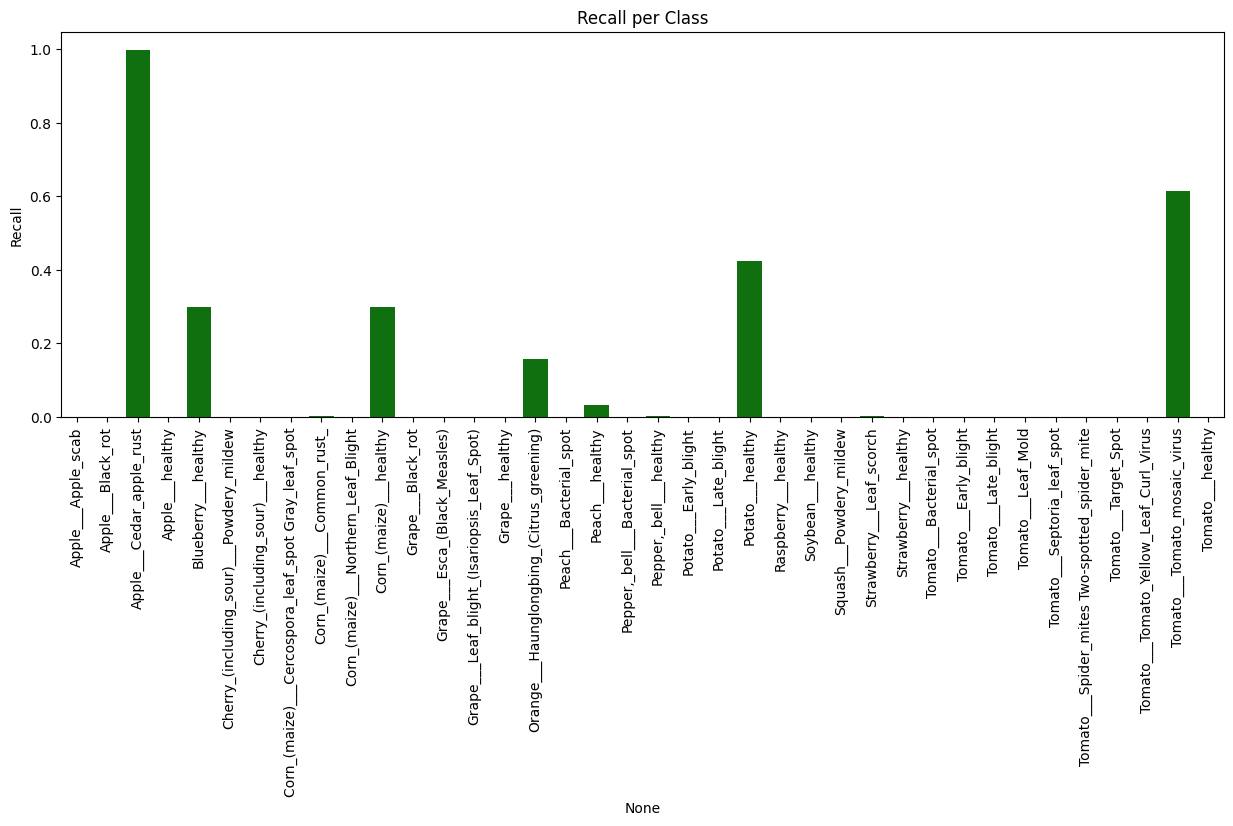

In [39]:
plt.figure(figsize=(15,5))
sns.barplot(x=report_df.index, y=report_df['recall'], color='green')
plt.xticks(rotation=90)
plt.ylabel('Recall')
plt.title('Recall per Class')
plt.show()


### F1-Score plot

c:\ProgramData\anaconda3\envs\Deeplearning_gpu_env\lib\site-packages\seaborn\categorical.py:1273: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(aggregator, agg_var)


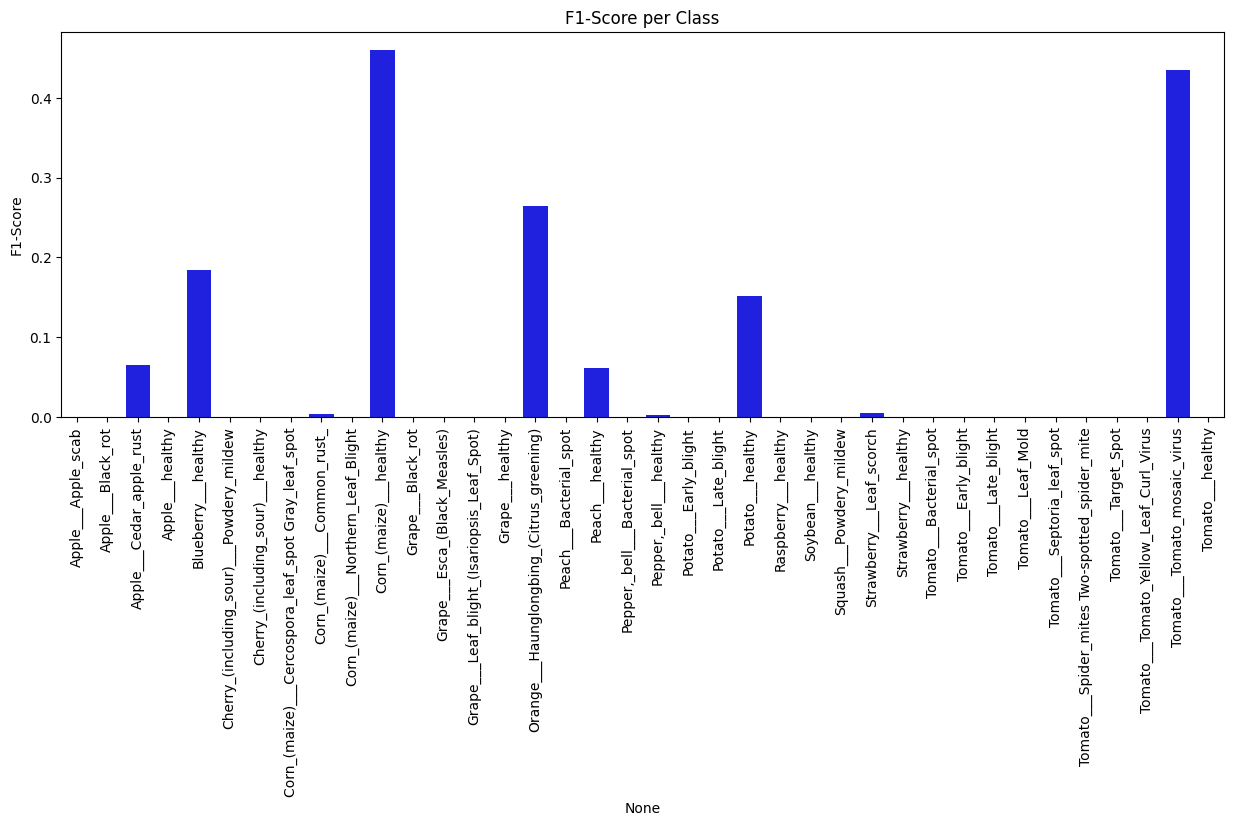

In [40]:
plt.figure(figsize=(15,5))
sns.barplot(x=report_df.index, y=report_df['f1-score'], color='blue')
plt.xticks(rotation=90)
plt.ylabel('F1-Score')
plt.title('F1-Score per Class')
plt.show()


### Confusion Matrix Visualization

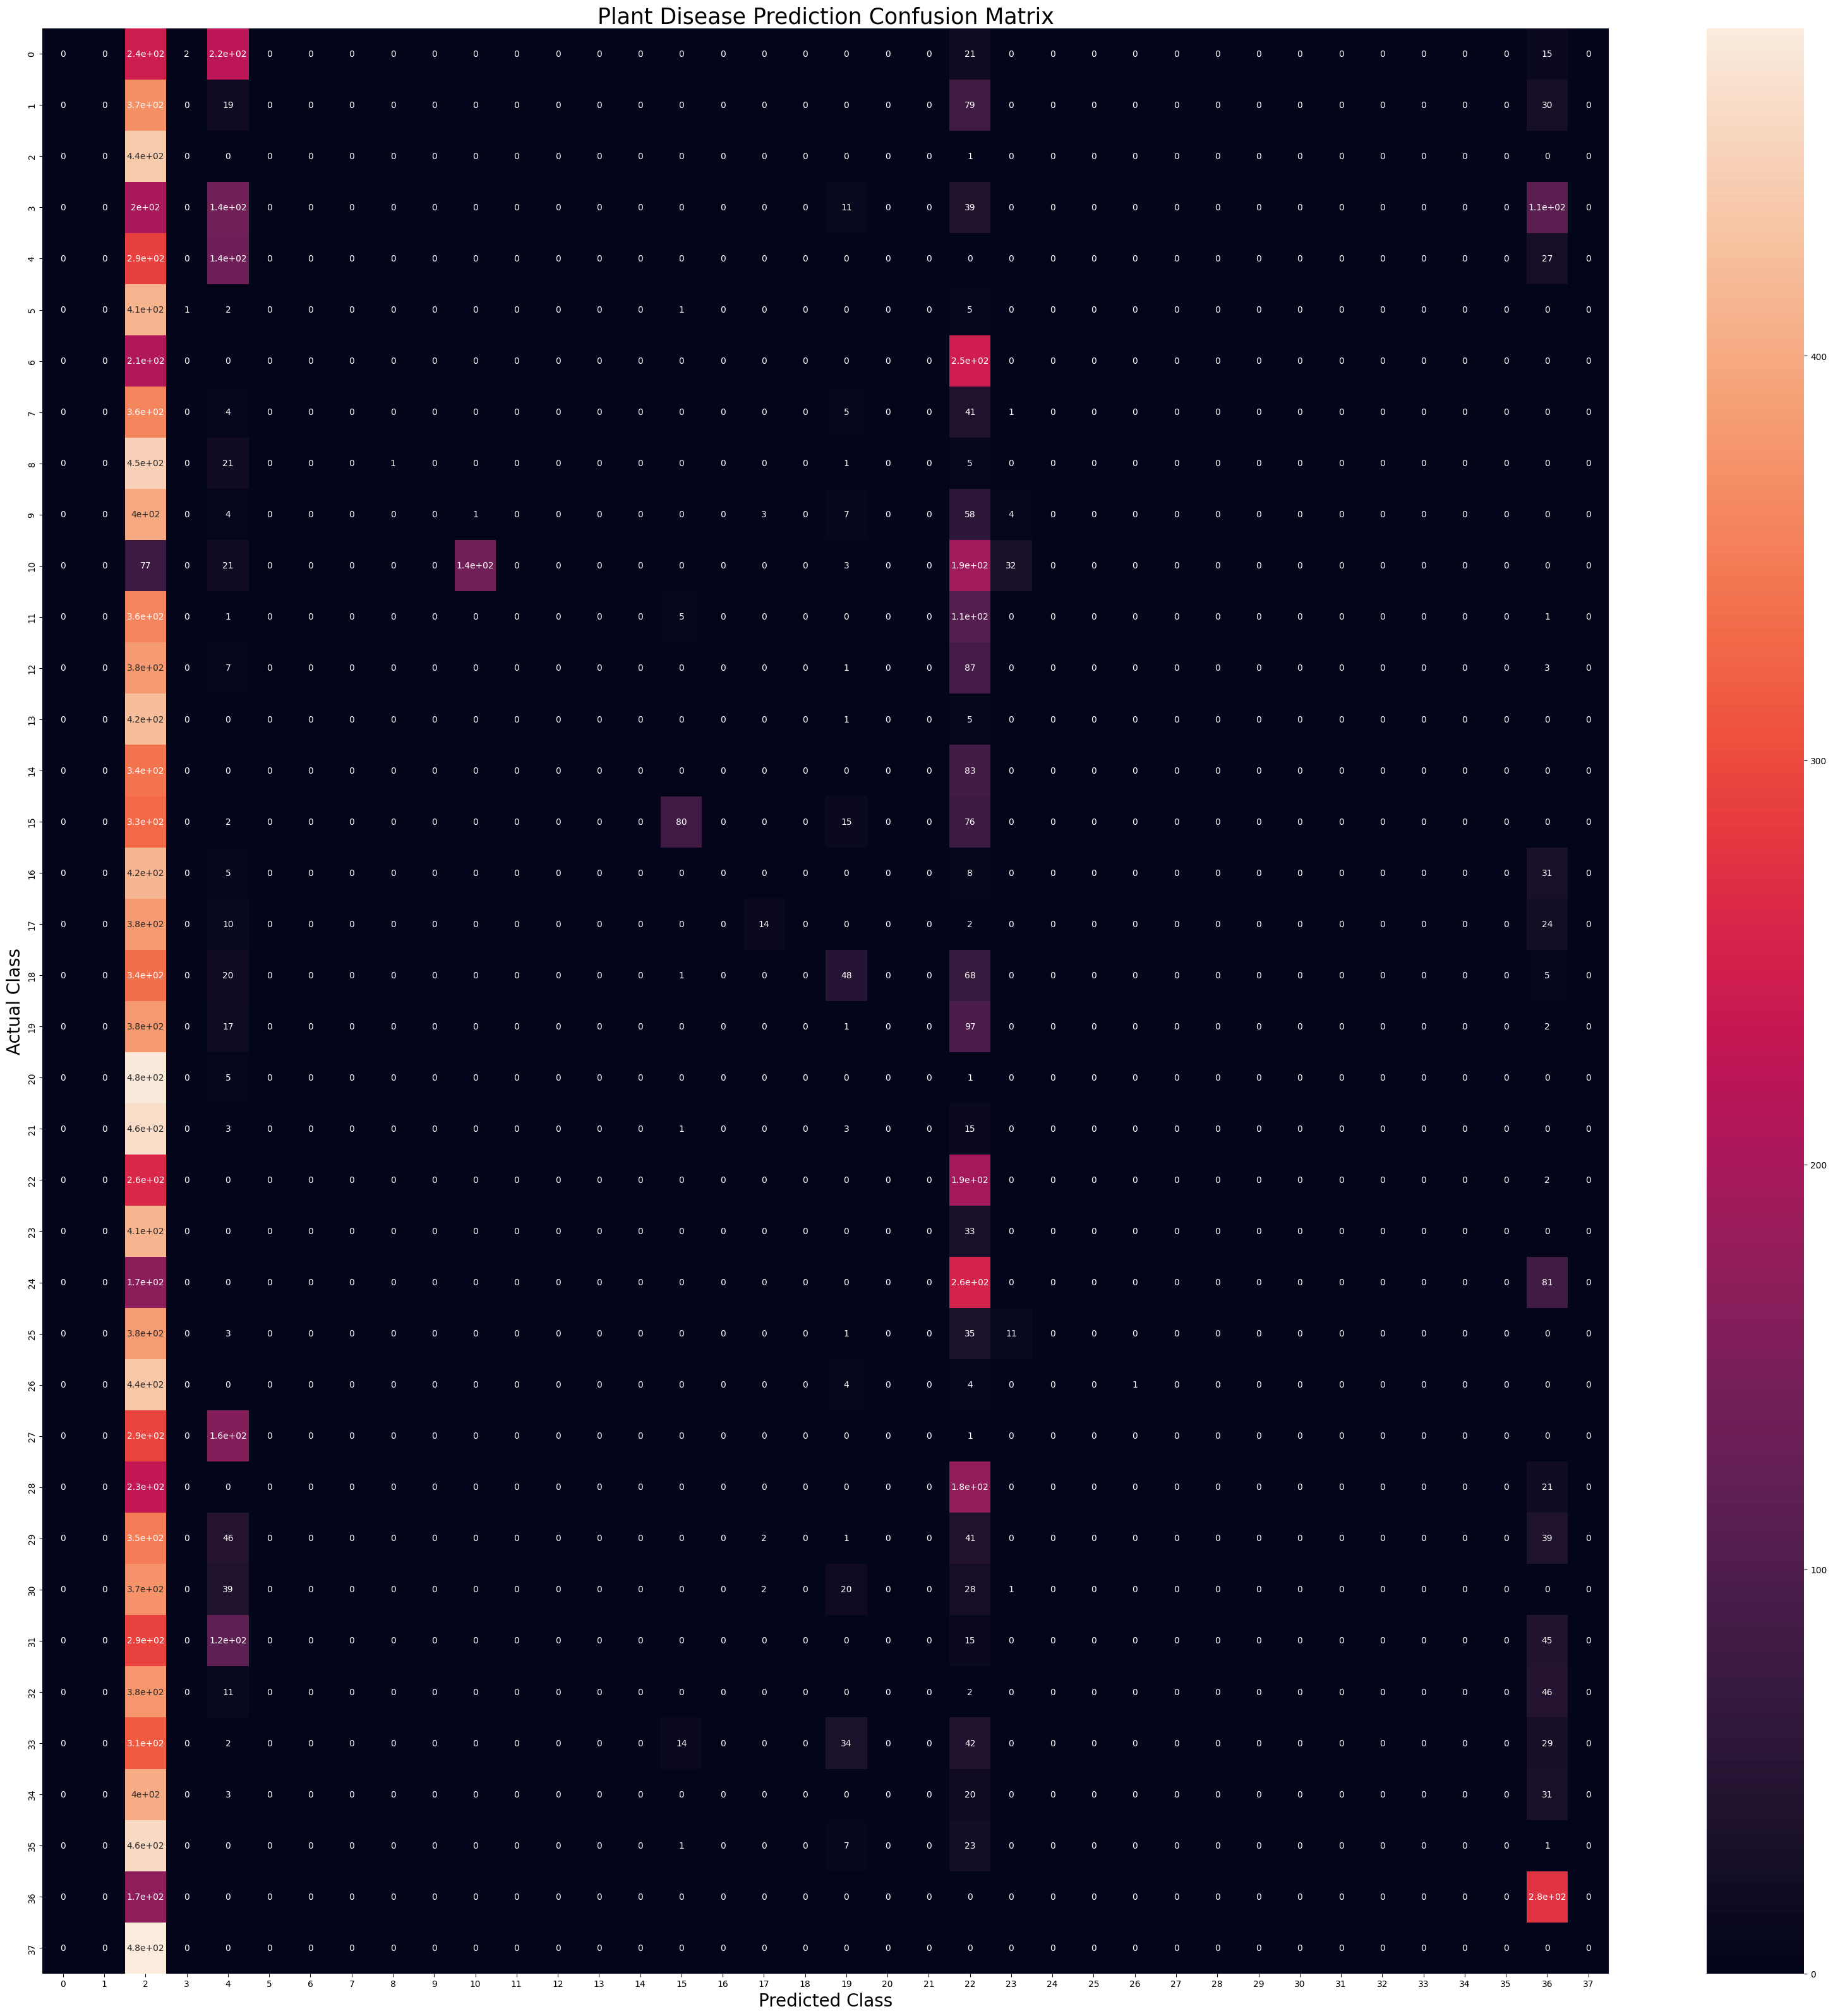

In [41]:
plt.figure(figsize=(40, 40))
sns.heatmap(cm,annot=True,annot_kws={"size": 10})

plt.xlabel('Predicted Class',fontsize = 20)
plt.ylabel('Actual Class',fontsize = 20)
plt.title('Plant Disease Prediction Confusion Matrix',fontsize = 25)
plt.show()

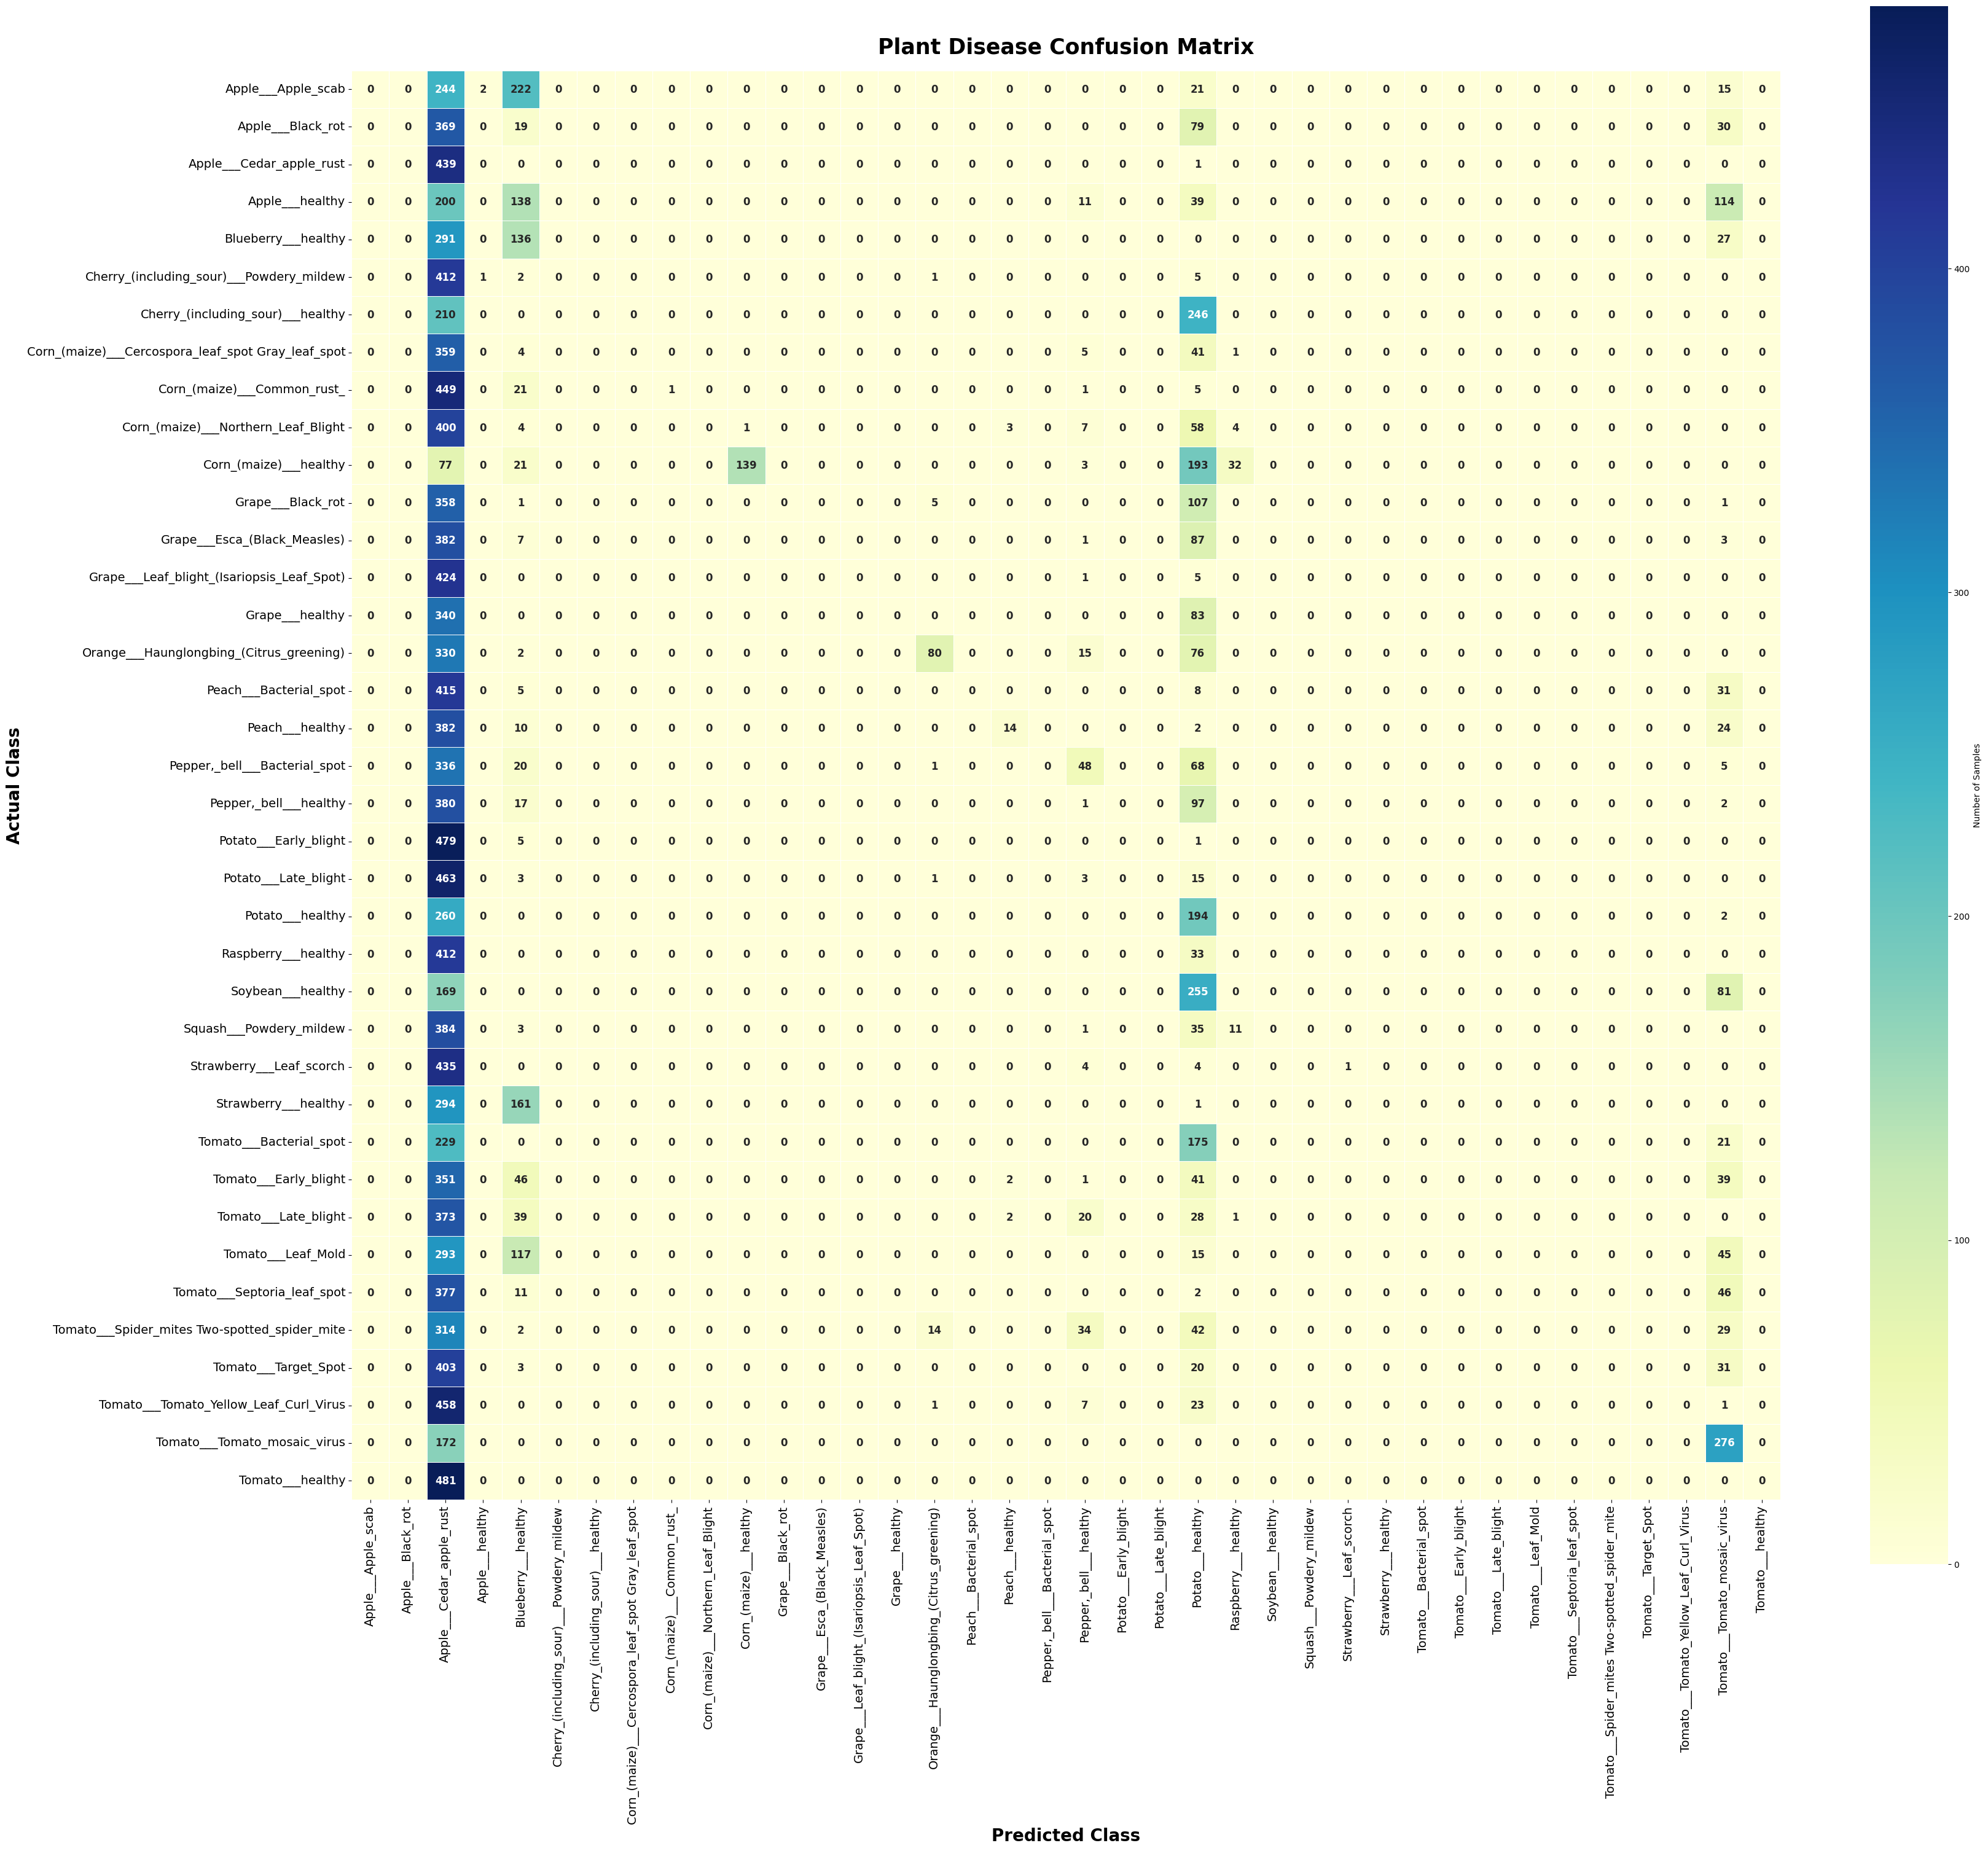

In [42]:
plt.figure(figsize=(35, 35))

sns.heatmap(
    cm,
    annot=True,
    fmt='d',
    cmap='YlGnBu',       # beautiful gradient color
    linewidths=0.5,      # thin lines between cells
    linecolor='white',   # white lines for separation
    square=True,         # squares instead of rectangles
    cbar_kws={"shrink": 0.8, 'label': 'Number of Samples'},  # colorbar styling
    annot_kws={"size": 12, "weight": "bold"}  # font inside boxes
)

plt.xticks(ticks=np.arange(len(class_name)) + 0.5, labels=class_name, rotation=90, fontsize=14)
plt.yticks(ticks=np.arange(len(class_name)) + 0.5, labels=class_name, rotation=0, fontsize=14)

plt.xlabel('Predicted Class', fontsize=20, weight='bold')
plt.ylabel('Actual Class', fontsize=20, weight='bold')
plt.title('Plant Disease Confusion Matrix', fontsize=25, weight='bold', pad=20)

plt.tight_layout()
plt.show()
